In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite
from astropy import units as u
from astropy import constants as const
from scipy.optimize import curve_fit
import glob

In [3]:
def Gauss(x, height, center, width):
    y = height*np.exp(-(x-center)**2/(2*width**2))
    return y

Latitude 2800
Longitude: 1907
Latitude 2000
Longitude: 1921
Latitude 3967
Longitude: 1938
Latitude 1863
Longitude: 2050
Latitude 2963
Longitude: 2050
Latitude 2175
Longitude: 2107
Latitude 1975
Longitude: 2193
Latitude 1875
Longitude: 2222
Latitude 4133
Longitude: 2229
Latitude 2900
Longitude: 2250
Latitude 2075
Longitude: 2336
Latitude 1963
Longitude: 2350
Latitude 1950
Longitude: 2507
Latitude 3250
Longitude: 2522
Latitude 2200
Longitude: 2550
Latitude 3250
Longitude: 2650
Latitude 2088
Longitude: 2750
Latitude 4667
Longitude: 3143
Latitude 3167
Longitude: 3222
Latitude 3400
Longitude: 3457
Latitude 4300
Longitude: 3716
Latitude 2325
Longitude: 4221
Latitude 3850
Longitude: 4300
Latitude 2425
Longitude: 4336


C:\Users\seven\AppData\Local\Temp\ipykernel_15132\688041289.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Latitude 1775
Longitude: 4607
Latitude 3963
Longitude: 4620
Latitude 2075
Longitude: 4693
Latitude 4038
Longitude: 4700
Latitude 4075
Longitude: 4720
Latitude 3863
Longitude: 4820
Latitude 2350
Longitude: 4821
Latitude 4067
Longitude: 5012
Latitude 1925
Longitude: 5150
Latitude 1925
Longitude: 5364
Latitude 2133
Longitude: 5567
Latitude 3513
Longitude: 5654
Latitude 3250
Longitude: 5664
Latitude 2200
Longitude: 5735
Integrals: [328.86912000000024, 679.1846400000006, 109.81120000000008, 640.0307200000005, 380.1356800000003, 336.8281600000003, 555.5750400000005, 671.2563200000005, 109.60256000000011, 351.0681600000003, 628.8460800000006, 628.8460800000006, 533.5616000000005, 367.39712000000037, 382.0147200000003, 227.4854400000002, 582.7942400000006, 70.30656000000008, 105.17120000000008, 87.46880000000009, 148.93696000000014, 440.60416000000043, 293.19680000000034, 405.1148800000003, 440.5107200000004, 246.50624000000025, 394.3833600000004, 194.81216000000018, 236.42112000000023, 249.39

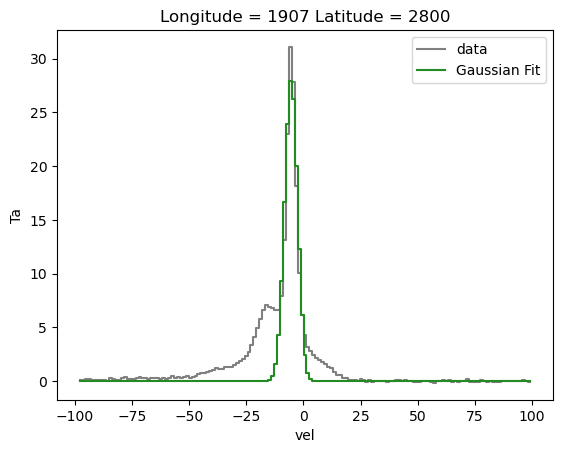

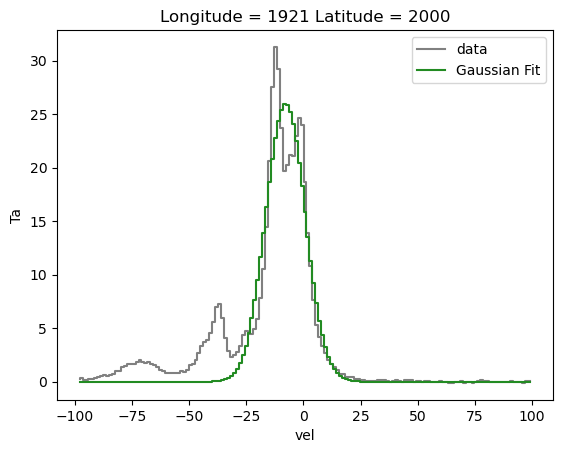

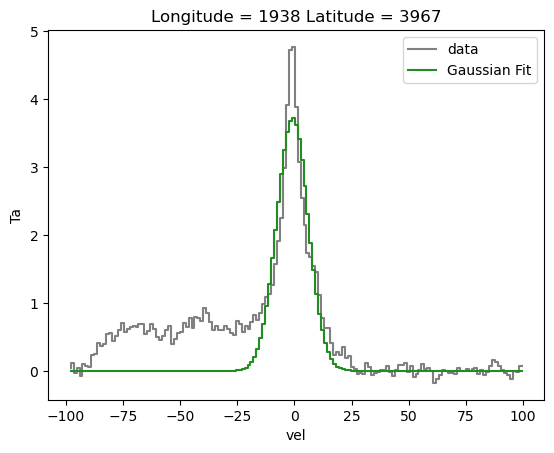

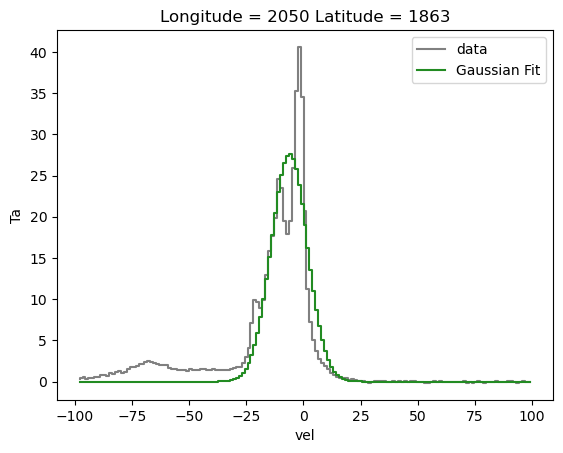

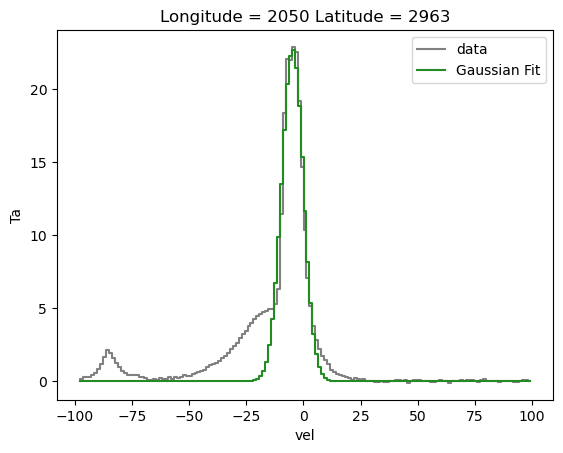

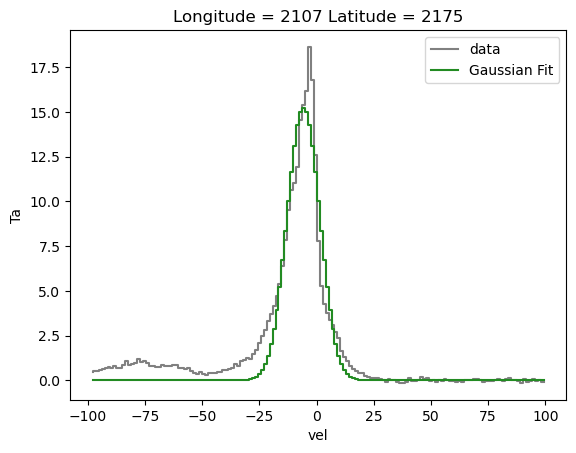

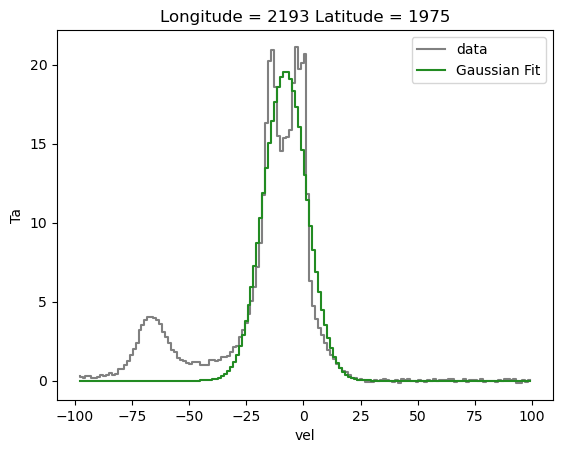

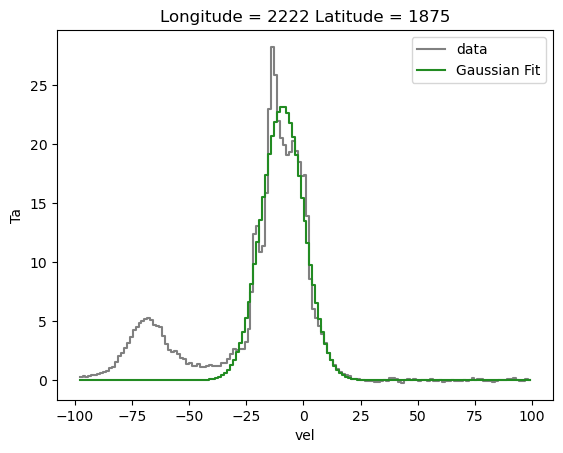

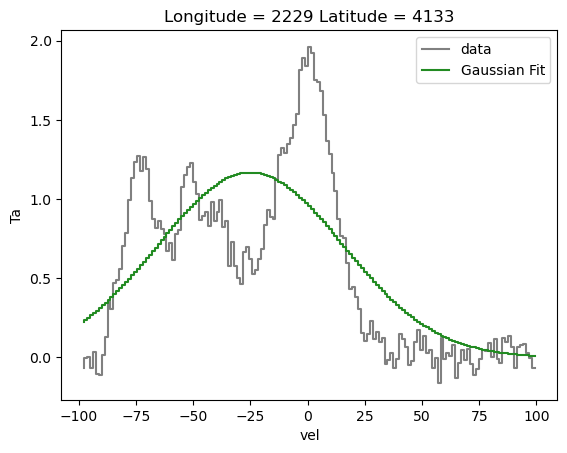

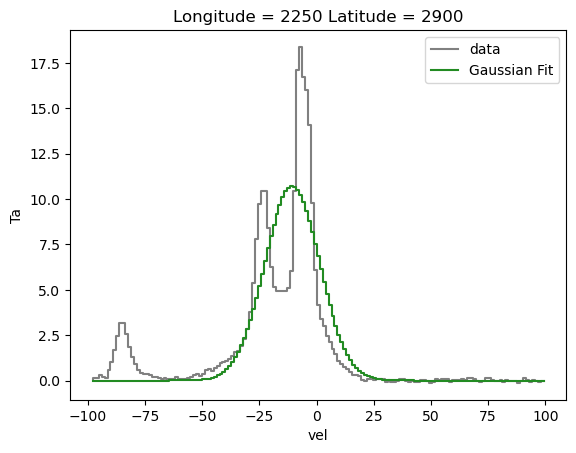

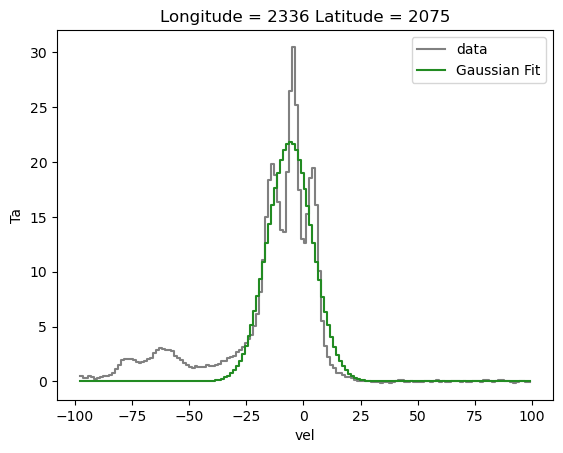

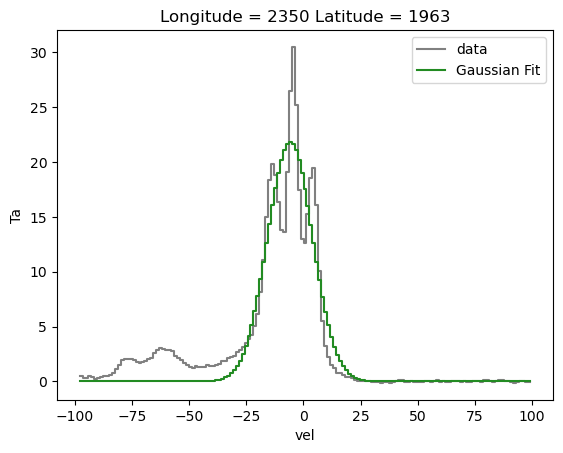

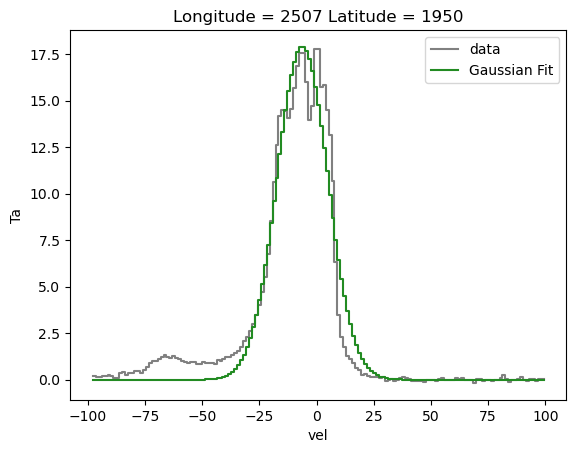

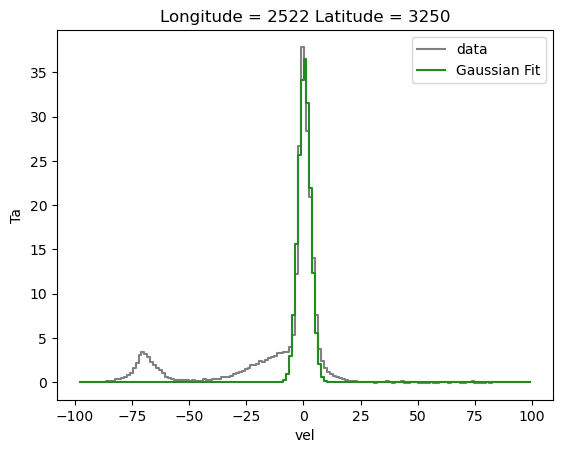

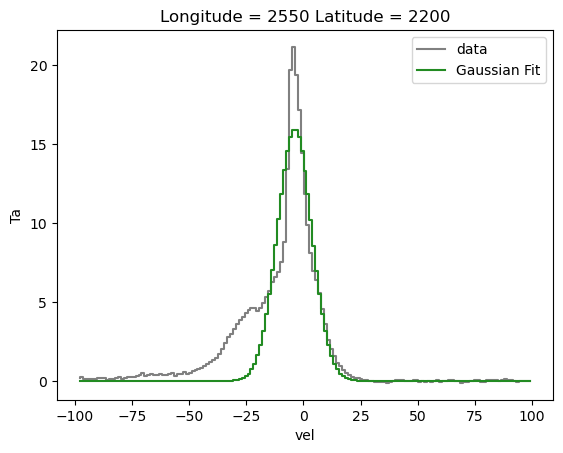

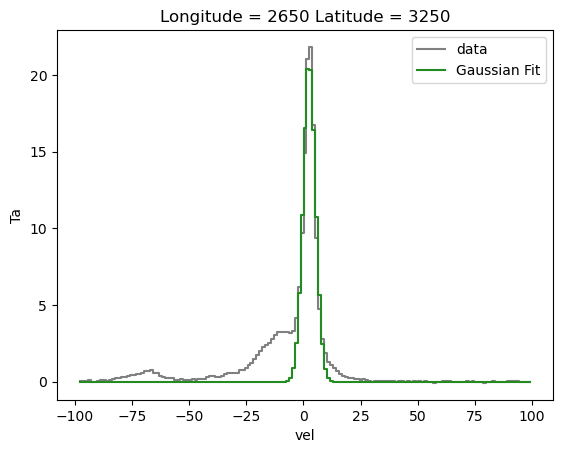

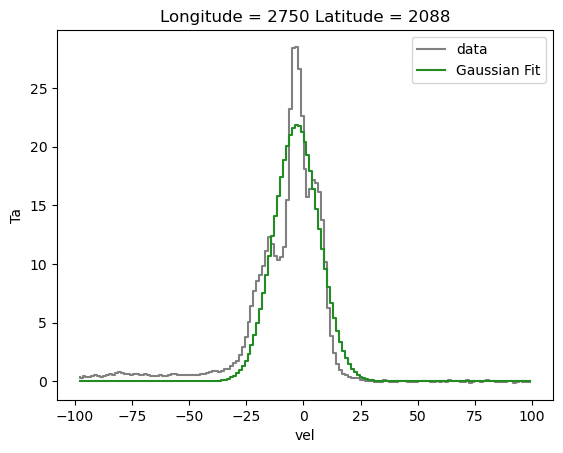

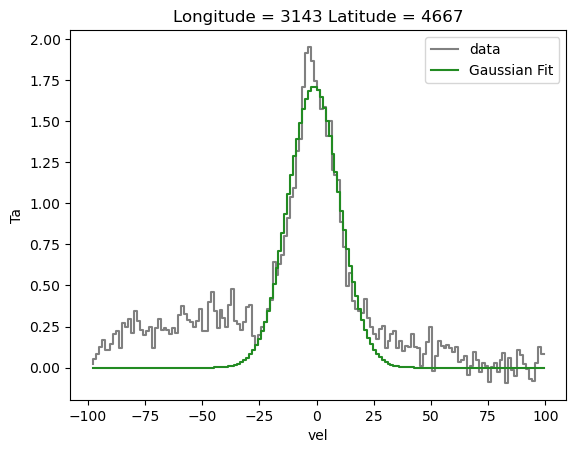

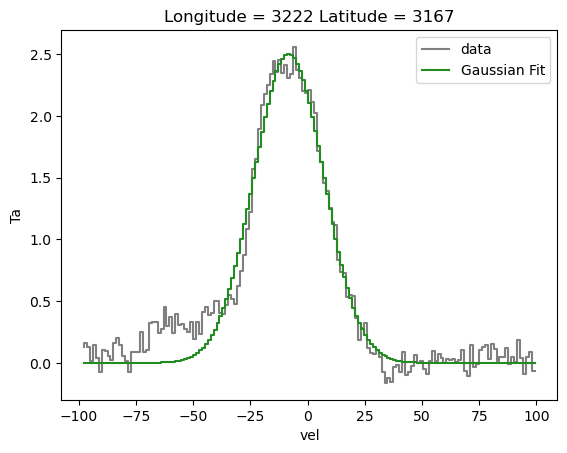

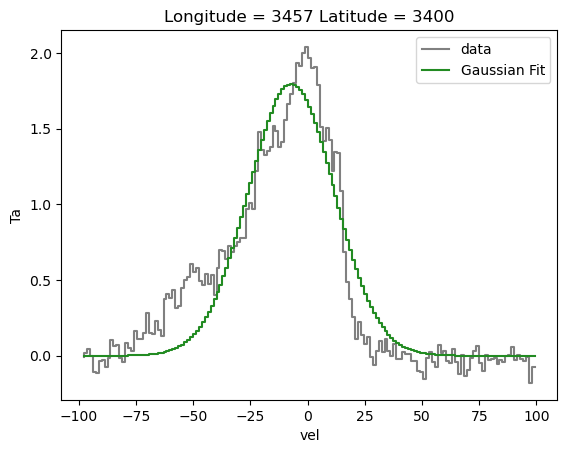

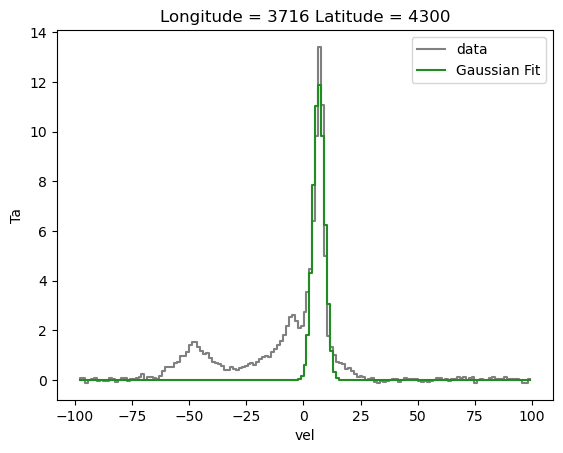

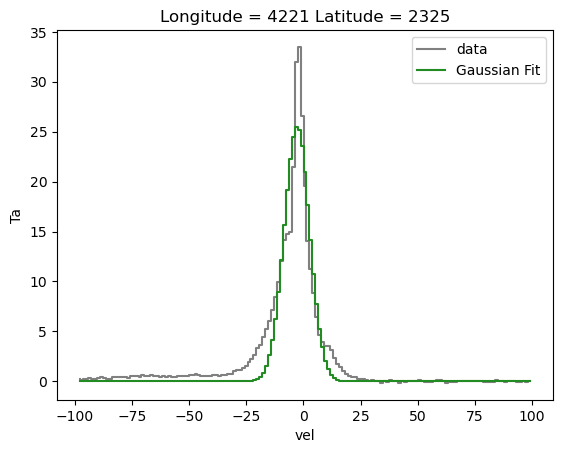

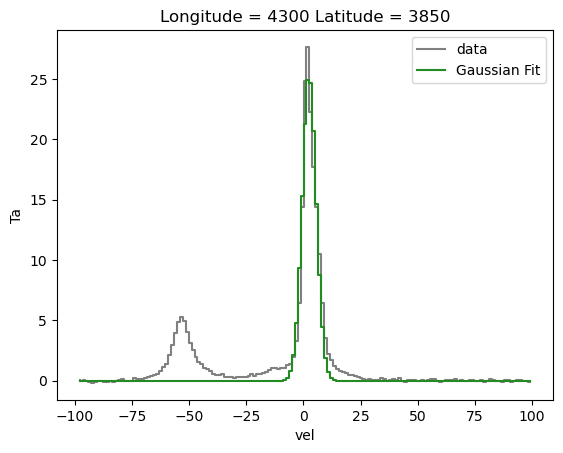

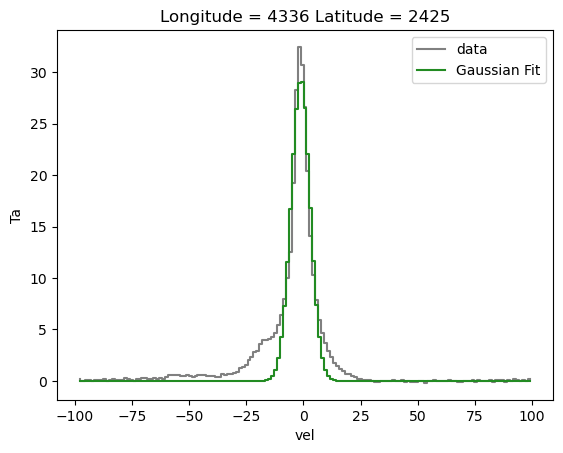

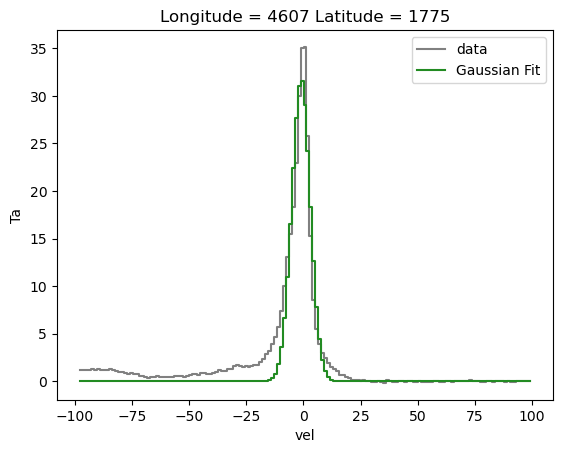

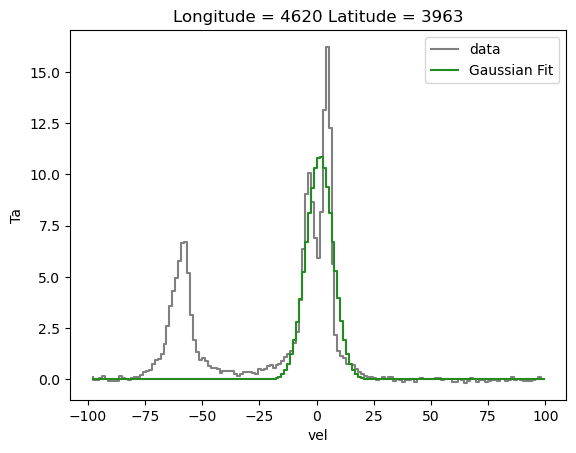

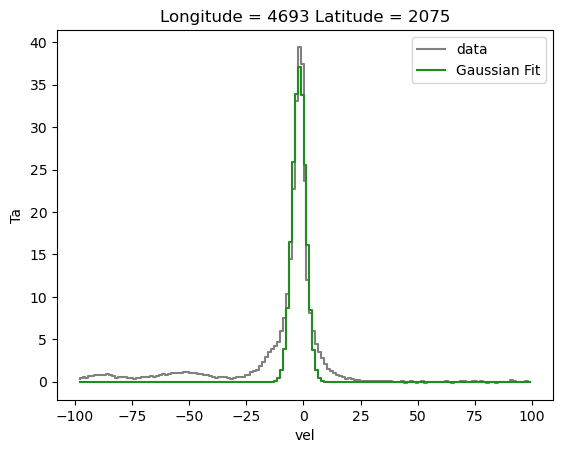

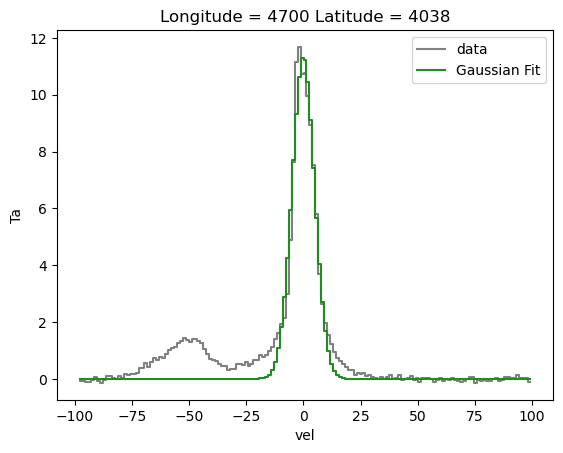

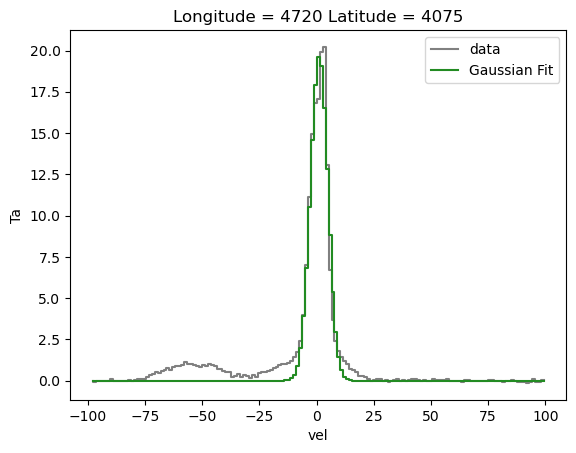

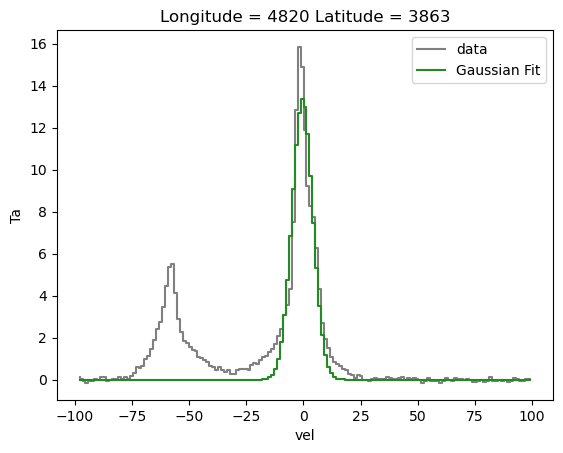

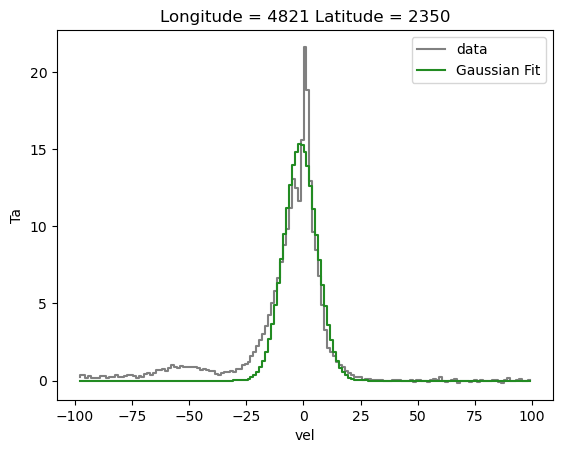

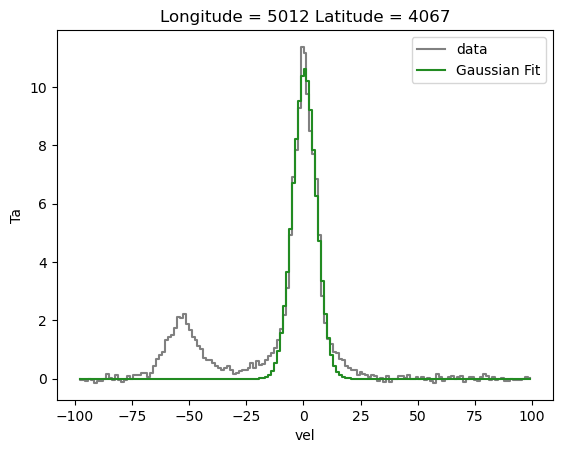

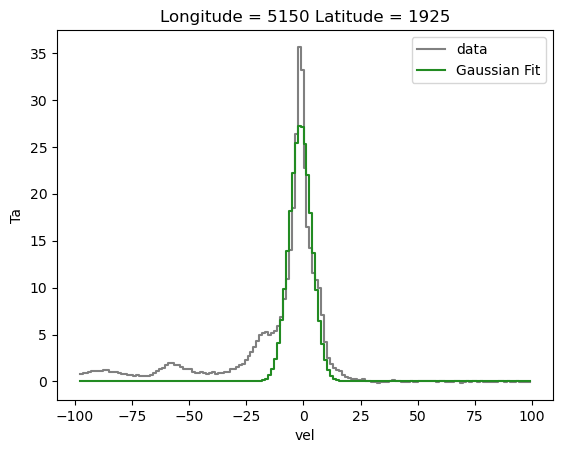

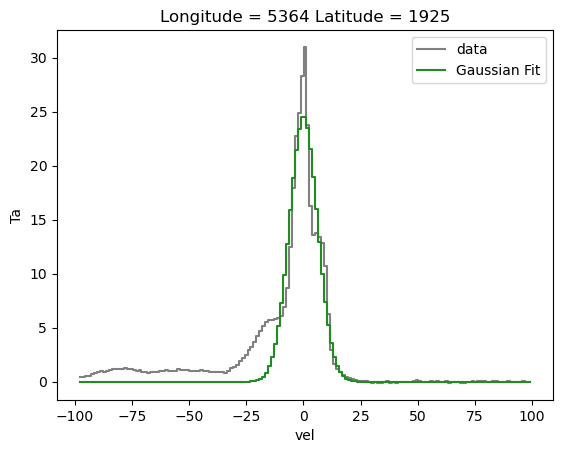

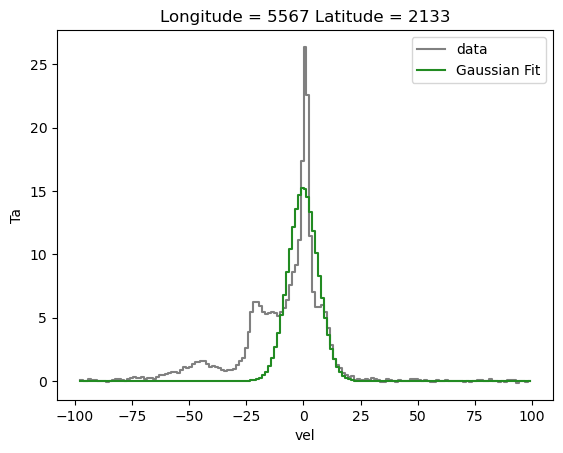

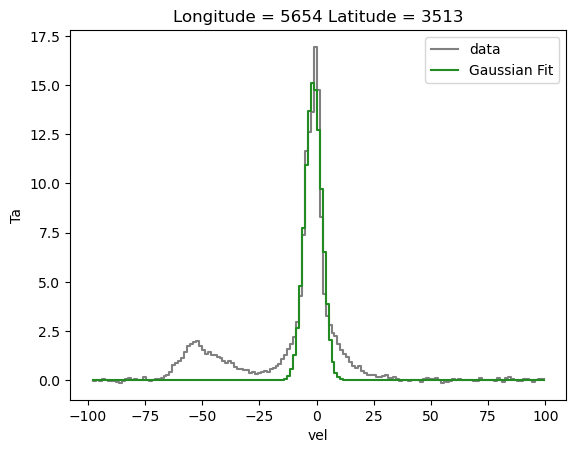

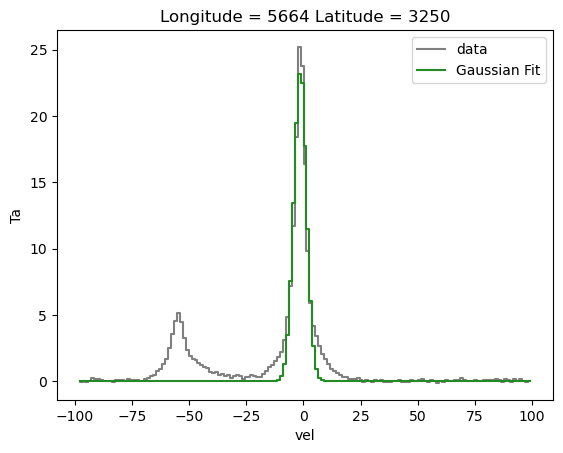

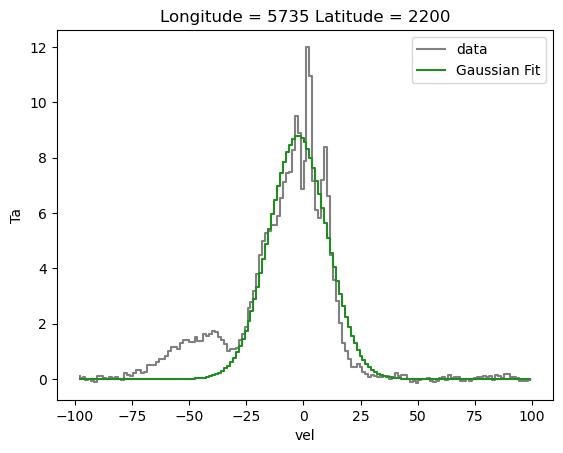

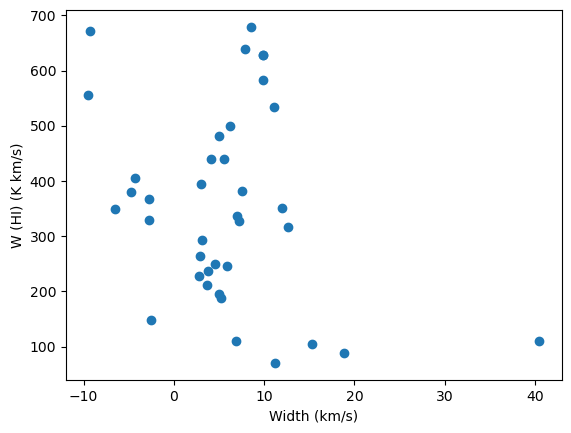

In [4]:
#HI Data For Loop:
aList = []
bList = []
cList = []
intList = []
intErrList = []
SigNoiseList = []
lonlist = []
latlist = []

datafiles = glob.glob("C:/Users/seven/OneDrive/Documents/HI Data/*.txt*")

for data in datafiles:
    HIdata = ascii.read(data, data_start = 13, data_end = 167) #data is a singular pathname, datafiles is array of pathnames
    vel = HIdata['col1']
    Ta = HIdata['col2']
    
    #Galactic Range Choice:
    igood = np.where((vel >= -100) & (vel <=100))
    
    #Select Galactic Range:
    vel = vel[igood]
    Ta = Ta[igood]
    
    #Begin with Single Gaussian Fit
    parameters, covariance = curve_fit(Gauss, vel, Ta, p0=[0.03, 0, 4])
    fitA = parameters[0]
    fitB = parameters[1]
    fitC = parameters[2]
    fit_y = Gauss(vel, fitA, fitB, fitC)
    
    #lon and lat
    print('Latitude', data[51:55])
    lat = int(data[51:55])
    latlist.append(lat)
    print('Longitude:', data[45:49])
    lon = int(data[45:49])
    lonlist.append(lon)    
    
    #plotting
    plt.figure()
    #fig, axs = plt.subplots(4, 4)
    plt.step(vel, Ta, 'grey', label = 'data')
    plt.step(vel, fit_y, 'forestgreen', label = 'Gaussian Fit')
    plt.legend()
    plt.xlabel('vel')
    plt.ylabel('Ta')
    plt.title('Longitude = ' +str(lon)+ " Latitude = " +str(lat))
    
    
    #integration
    integral = np.sum(Ta[igood])*(vel[1]-vel[0])
    intList.append(integral)
    
    #integral error
    err = np.sqrt(len(vel[igood])*np.std(Ta[igood]))
    intErrList.append(err)
    
    #noise
    SigNoise = integral/err
    SigNoiseList.append(SigNoise)
    
    #Parameters
    a = parameters[0]
    aList.append(a)
    b = parameters[1]
    bList.append(b)
    c = parameters[2]
    cList.append(c)
    

    
#Plotting Integrals and Center Velocity
plt.figure()
plt.scatter(cList, intList)
plt.ylabel("W (HI) (K km/s)")
plt.xlabel("Width (km/s)")


#PRINTING: Not indented so we print the complete array, instead of cycling through incomplete ones due to for loop.
print('Integrals:', intList)
print('Integral Error:', intErrList)
print('Signal Noise:', SigNoiseList)

#Parameter Printing
print('Height:', aList)
print('Center Velocity:', bList)
print('Width:', cList)
